<a href="https://colab.research.google.com/github/Elysian0987/PRODIGY_ML_02/blob/main/prodigy_T2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [ ]:
data = pd.read_csv('Mall_Customers.csv')

In [ ]:
data_url = "https://www.kaggleusercontent.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python/download"  # Replace with direct file path if downloaded
data = pd.read_csv("Mall_Customers.csv")

In [ ]:
print(data.head())
print(data.info())
print(data.describe())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   Cluster  
0        2  
1        2  
2        3  
3        2  
4        2  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
 5   Clus

In [ ]:
features = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

In [ ]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [ ]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

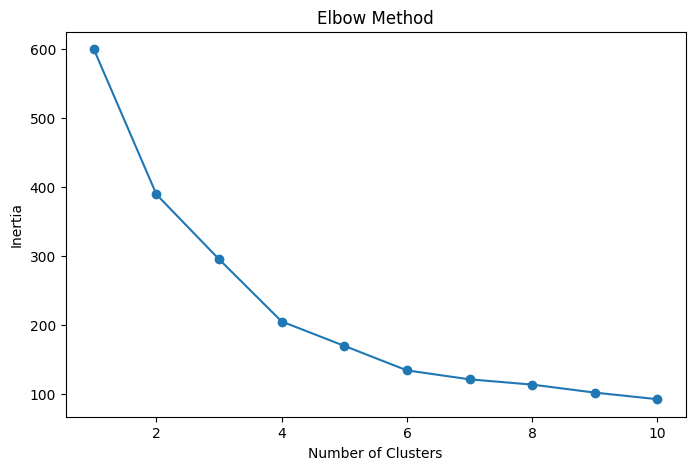

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [ ]:
optimal_clusters = 5
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans.fit(scaled_features)
labels = kmeans.labels_

In [ ]:
data['Cluster'] = labels

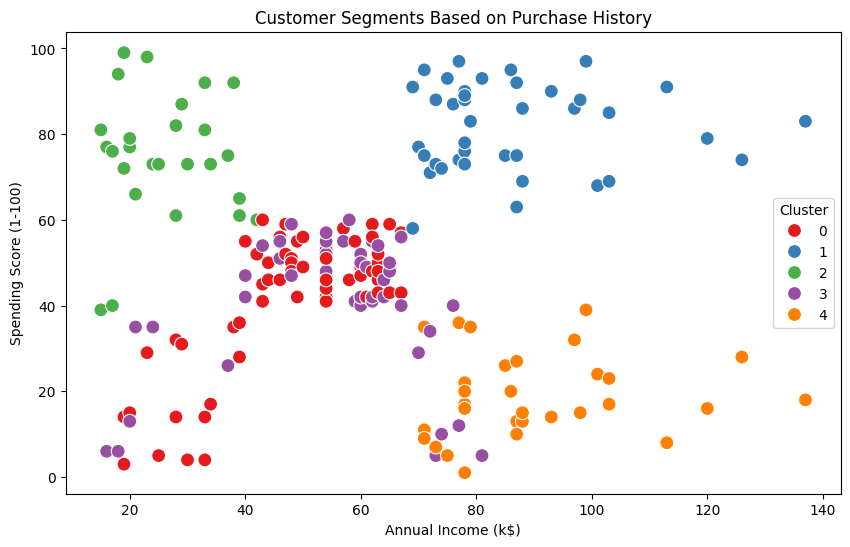

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=data['Annual Income (k$)'],
    y=data['Spending Score (1-100)'],
    hue=data['Cluster'],
    palette='Set1',
    s=100
)
plt.title('Customer Segments Based on Purchase History')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.show()

In [ ]:
silhouette_avg = silhouette_score(scaled_features, labels)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.40846873777345605
